PRELIMINARY STEP: import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

Reading the dataset thanks to the built-in function in pandas.

In [4]:
ds = pd.read_csv("./credit_prediction.csv") #open and read the file using pandas

In [4]:
ds.head(10) #show the first 10 elements

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,26.822620,265.0,No,80.415295,NaN,312.494089,Good
1,1,23.0,Scientist,NaN,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,266.0,No,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,23.0,Scientist,19114.12,1824.843333,NaN,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,Good,809.98,31.377862,268.0,No,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,23.0,NaN,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,269.0,No,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,27.262259,270.0,No,62.430172,High_spent_Medium_value_payments,340.479212,Good
6,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,271.0,No,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,7,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,23.933795,NaN,No,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,8,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,NaN,Credit-Builder Loan,...,2.0,Good,605.03,NaN,319.0,NaN,NaN,Low_spent_Small_value_payments,470.690627,Standard
9,9,28.0,Teacher,34847.84,3037.986667,NaN,4.0,6.0,1.0,Credit-Builder Loan,...,2.0,Good,605.03,38.550848,320.0,No,40.391238,High_spent_Large_value_payments,484.591214,Good


In [5]:
ds.duplicated().sum() #let's see how many duplicates

0

<AxesSubplot:>

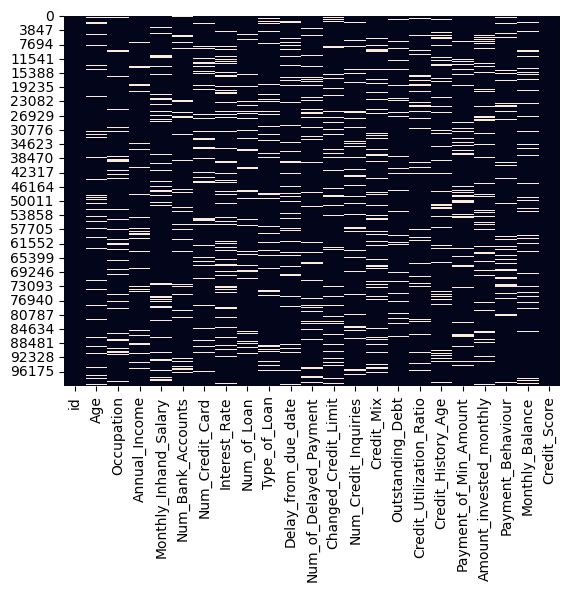

In [6]:
sns.heatmap(ds.isna(), cbar = False) #to visualize null values for each column

In [7]:
ds.value_counts() #how many variables
ds.value_counts(normalize = True) #now in percentages

id     Age   Occupation     Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Type_of_Loan                                                             Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  Amount_invested_monthly  Payment_Behaviour                 Monthly_Balance  Credit_Score
5      23.0  Scientist      19114.12       1824.843333            3.0                4.0              3.0            4.0          Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan      8.0                  4.0                     9.27                  4.0                   Good        809.98            27.262259                 270.0               No                     62.430172                High_spent_Medium_value_payments  340.479212       Good            0.000091
66876  20.0  Media_Manager  

In [5]:
#we can eliminate a priori some columns, as we can consider them as not relevant 
ds = ds.drop(columns=['id','Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Changed_Credit_Limit', 'Payment_of_Min_Amount'])
ds.corr() #to see correlations, but all categorical ones will be ignored, so change them

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,-0.175110,-0.186063,-0.251603,-0.202975,0.023721,0.006597,-0.002635
Annual_Income,0.094214,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,-0.249761,-0.287701,-0.280632,-0.269997,0.177065,0.055108,-0.004711
Monthly_Inhand_Salary,0.092432,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,-0.249382,-0.285382,-0.279105,-0.269707,0.178518,0.053704,-0.004176
Num_Bank_Accounts,-0.192405,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,0.560583,0.601553,0.515379,0.506999,-0.070942,-0.015364,0.005845
Num_Credit_Card,-0.147670,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,0.479751,0.424036,0.458086,0.491157,-0.055238,-0.010274,0.004964
Interest_Rate,-0.218744,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,0.591529,0.571366,0.631691,0.628982,-0.077353,-0.018500,0.004477
Num_of_Loan,-0.215283,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,0.503398,0.473959,0.564533,0.639486,-0.101013,-0.012386,0.001958
Delay_from_due_date,-0.175110,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,1.000000,0.540332,0.539325,0.572768,-0.064390,-0.009811,0.004988
Num_of_Delayed_Payment,-0.186063,-0.287701,-0.285382,0.601553,0.424036,0.571366,0.473959,0.540332,1.000000,0.499689,0.503561,-0.072964,-0.021178,0.007799
Num_Credit_Inquiries,-0.251603,-0.280632,-0.279105,0.515379,0.458086,0.631691,0.564533,0.539325,0.499689,1.000000,0.597357,-0.079951,-0.017745,-0.002554


In [6]:
from sklearn.preprocessing import LabelEncoder
ds['Credit_Mix'] = LabelEncoder().fit_transform(ds['Credit_Mix'])
ds['Payment_Behaviour'] = LabelEncoder().fit_transform(ds['Payment_Behaviour'])

In [7]:
#from sklearn.preprocessing import LabelEncoder
#ds['Credit_Mix'] = LabelEncoder().fit_transform(ds['Credit_Mix'])
#ds['Payment_Behaviour'] = LabelEncoder().fit_transform(ds['Payment_Behaviour'])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pipeline=ColumnTransformer([('num',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,11,12,13,15]),('cat',OneHotEncoder(),[10,14])])



ds.head()
#again
ds.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Age,1.000000,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,-0.175110,-0.186063,-0.251603,0.060897,-0.202975,0.023721,0.006597,-0.030798,-0.002635
Annual_Income,0.094214,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,-0.249761,-0.287701,-0.280632,0.078006,-0.269997,0.177065,0.055108,-0.265724,-0.004711
Monthly_Inhand_Salary,0.092432,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,-0.249382,-0.285382,-0.279105,0.077388,-0.269707,0.178518,0.053704,-0.266155,-0.004176
Num_Bank_Accounts,-0.192405,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,0.560583,0.601553,0.515379,-0.184559,0.506999,-0.070942,-0.015364,0.080292,0.005845
Num_Credit_Card,-0.147670,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,0.479751,0.424036,0.458086,-0.263867,0.491157,-0.055238,-0.010274,0.063975,0.004964
Interest_Rate,-0.218744,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,0.591529,0.571366,0.631691,-0.259463,0.628982,-0.077353,-0.018500,0.090950,0.004477
Num_of_Loan,-0.215283,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,0.503398,0.473959,0.564533,-0.351639,0.639486,-0.101013,-0.012386,0.077168,0.001958
Delay_from_due_date,-0.175110,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,1.000000,0.540332,0.539325,-0.326715,0.572768,-0.064390,-0.009811,0.077015,0.004988
Num_of_Delayed_Payment,-0.186063,-0.287701,-0.285382,0.601553,0.424036,0.571366,0.473959,0.540332,1.000000,0.499689,-0.195698,0.503561,-0.072964,-0.021178,0.084444,0.007799
Num_Credit_Inquiries,-0.251603,-0.280632,-0.279105,0.515379,0.458086,0.631691,0.564533,0.539325,0.499689,1.000000,-0.267859,0.597357,-0.079951,-0.017745,0.086762,-0.002554


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       90113 non-null   float64
 1   Annual_Income             89811 non-null   float64
 2   Monthly_Inhand_Salary     89881 non-null   float64
 3   Num_Bank_Accounts         89935 non-null   float64
 4   Num_Credit_Card           90131 non-null   float64
 5   Interest_Rate             89999 non-null   float64
 6   Num_of_Loan               90030 non-null   float64
 7   Delay_from_due_date       90053 non-null   float64
 8   Num_of_Delayed_Payment    89927 non-null   float64
 9   Num_Credit_Inquiries      89971 non-null   float64
 10  Credit_Mix                100000 non-null  int32  
 11  Outstanding_Debt          90154 non-null   float64
 12  Credit_Utilization_Ratio  89988 non-null   float64
 13  Amount_invested_monthly   89955 non-null   fl

In [12]:
print(ds.columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [8]:
#pre-process

#replace missing values with the mode

for i in ds.columns[:-1]:
    
    if i == 'Credit_Mix' or i == 'Payment_Behaviour':
        ds[i].fillna(ds[i].mode(), inplace = True)
    else:
        ds[i].fillna(ds[i].mean(), inplace = True)
        
ds.isnull().sum() #check how many null values in ds now
ds.info() #contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int32  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In [14]:
description = ds.describe() #statistical summary
ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int32  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


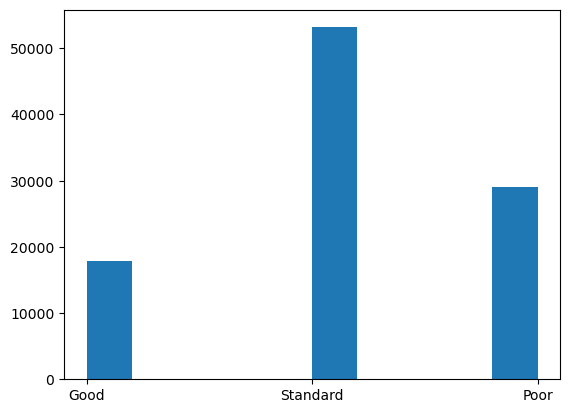

In [15]:
print(pd.value_counts(ds['Credit_Score']))
_= plt.hist(ds['Credit_Score']) # Assign the result of plt.hist to variable _. This is a common trick to discard unwanted output.
plt.show()

In order to see the popularity of age

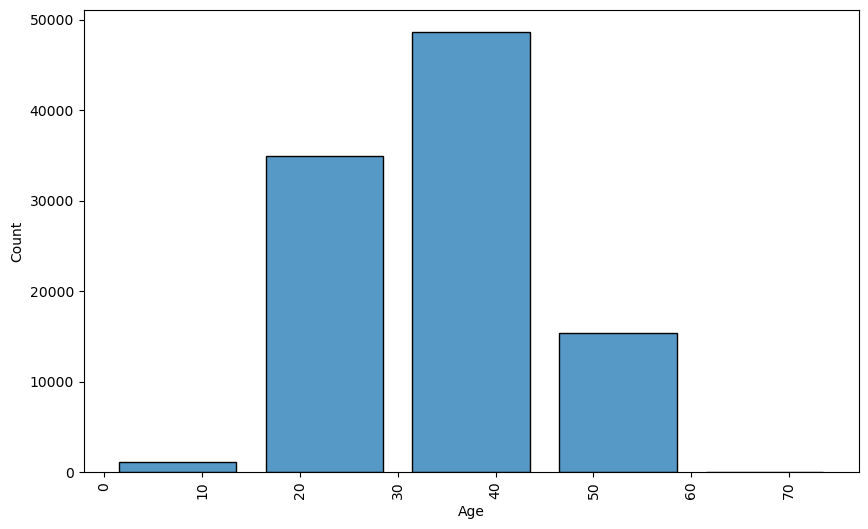

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(ds['Age'], bins=[0,15,30,45,60,75], shrink=.8)
plt.xticks(rotation=90);

Remove outliers

Outliers are points that are noticebly different from the others, this is why it is better to remove them.
We have decided to visualize them thanks to the boxplot, realized thanks to seaborn.

In [10]:
from numpy import percentile

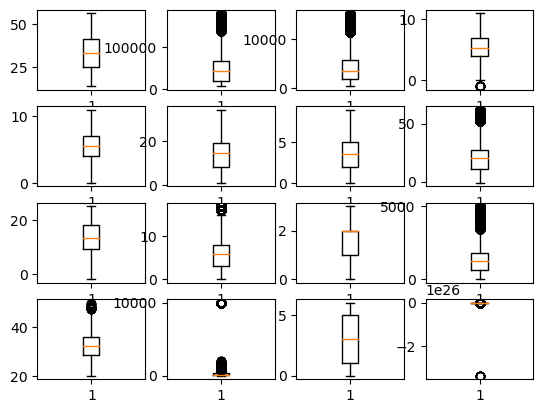

In [18]:
fig, axs = plt.subplots(4,4)
a = 0
b = 0 
for x in ds.columns:
    #a = sns.boxplot(ds[x])
# using the variable axs for multiple Axes
    axs[b, a].boxplot(ds[x])
    if a == 3:
        a = 0
        b = b+1
    else:
        a = a+1
    if b == 4:
        break



<AxesSubplot:>

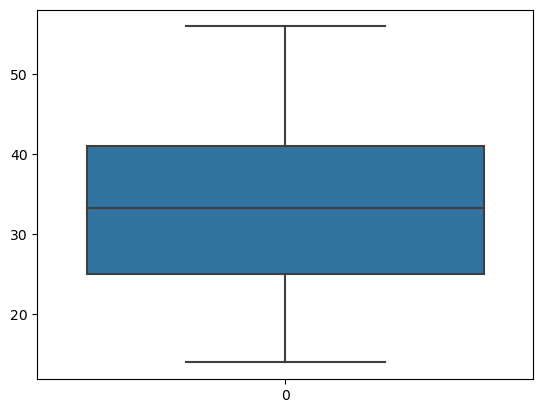

In [19]:
sns.boxplot(ds['Age'])

Percentiles: 25th=20347.965, 75th=67531.720, IQR=47183.755
Identified outliers: 3138


<AxesSubplot:>

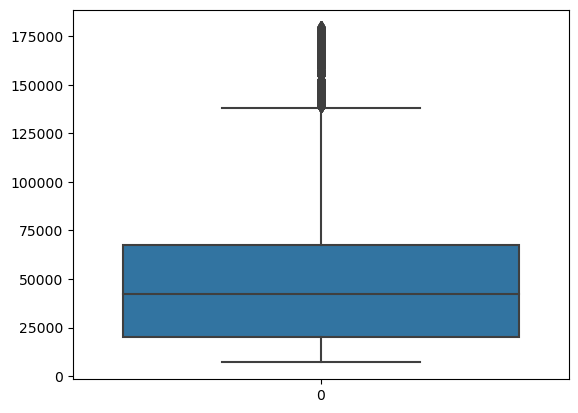

In [20]:


q25, q75 = percentile(ds['Annual_Income'], 25), percentile(ds['Annual_Income'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Annual_Income'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))


sns.boxplot(ds['Annual_Income'])

<AxesSubplot:>

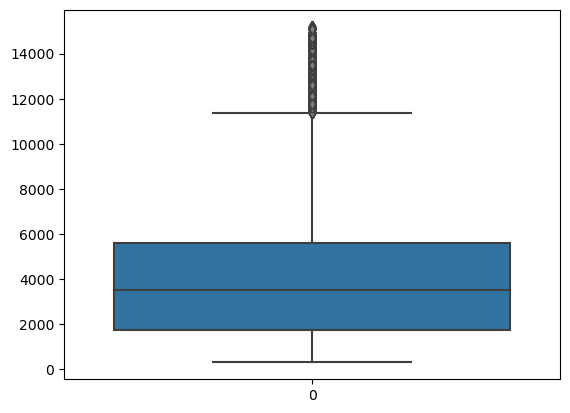

In [21]:
sns.boxplot(ds['Monthly_Inhand_Salary'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=1724.938, 75th=5582.571, IQR=3857.632
Identified outliers: 3371


<AxesSubplot:>

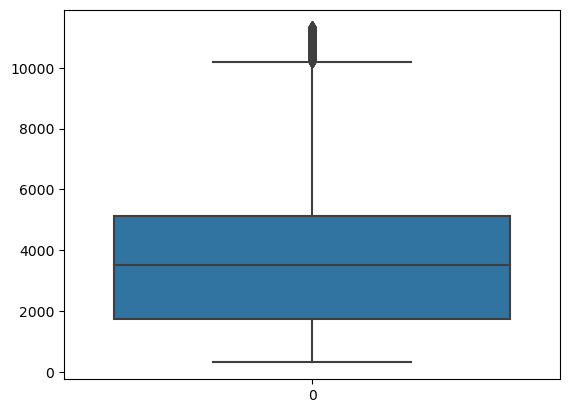

In [11]:
q25, q75 = percentile(ds['Monthly_Inhand_Salary'], 25), percentile(ds['Monthly_Inhand_Salary'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Monthly_Inhand_Salary'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

for i in outliers:
    ds['Monthly_Inhand_Salary'] = ds['Monthly_Inhand_Salary'].replace(i,ds['Monthly_Inhand_Salary'].mean())

sns.boxplot(ds['Monthly_Inhand_Salary'])

<AxesSubplot:>

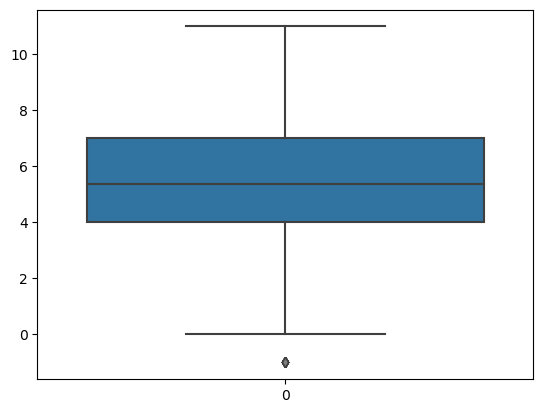

In [23]:
sns.boxplot(ds['Num_Bank_Accounts'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=4.000, 75th=7.000, IQR=3.000
Identified outliers: 19


<AxesSubplot:>

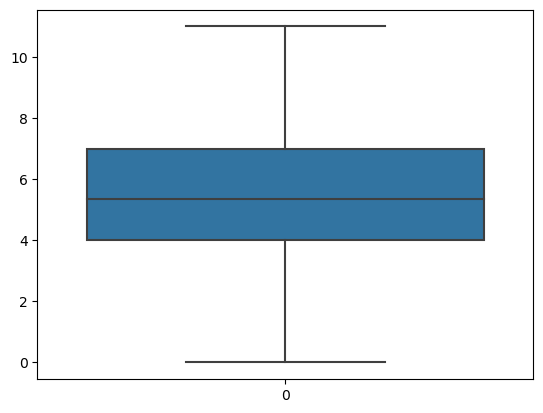

In [12]:
q25, q75 = percentile(ds['Num_Bank_Accounts'], 25), percentile(ds['Num_Bank_Accounts'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Num_Bank_Accounts'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

for i in outliers:
    ds['Num_Bank_Accounts'] = ds['Num_Bank_Accounts'].replace(i,ds['Num_Bank_Accounts'].mean())


sns.boxplot(ds['Num_Bank_Accounts'])

<AxesSubplot:>

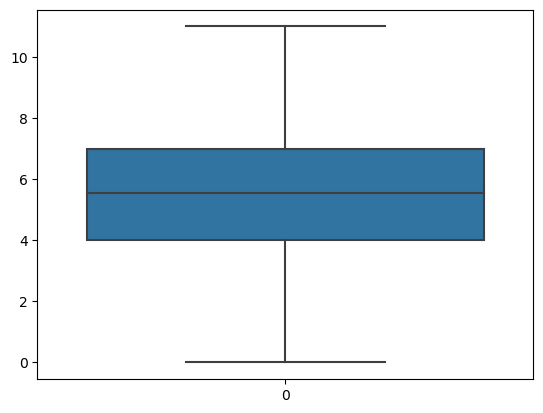

In [25]:
sns.boxplot(ds['Num_Credit_Card'], flierprops = dict(markerfacecolor = '0.50', markersize = 5)) 

Percentiles: 25th=4.000, 75th=7.000, IQR=3.000
Identified outliers: 0


<AxesSubplot:>

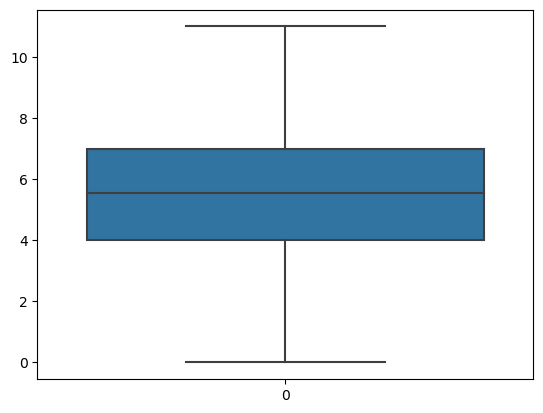

In [26]:
q25, q75 = percentile(ds['Num_Credit_Card'], 25), percentile(ds['Num_Credit_Card'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Num_Credit_Card'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Num_Credit_Card'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

<AxesSubplot:>

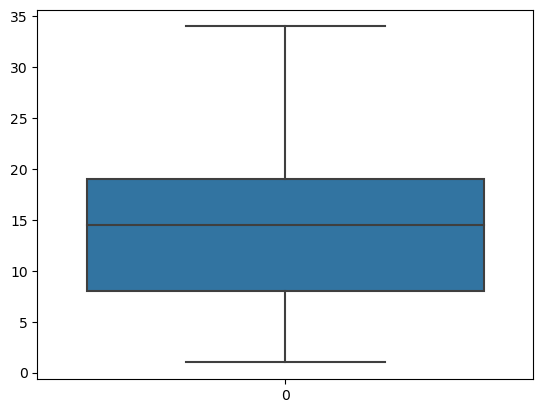

In [27]:
sns.boxplot(ds['Interest_Rate'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=8.000, 75th=19.000, IQR=11.000
Identified outliers: 0


<AxesSubplot:>

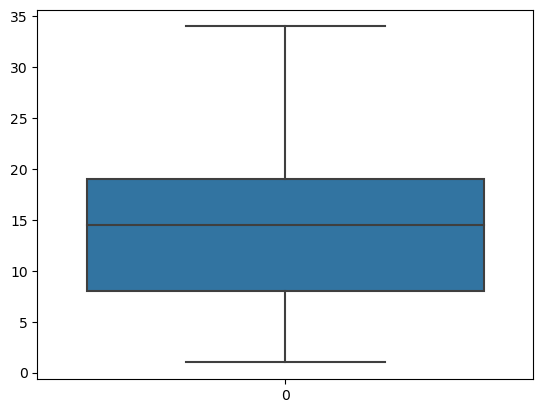

In [28]:

q25, q75 = percentile(ds['Interest_Rate'], 25), percentile(ds['Interest_Rate'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Interest_Rate'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Interest_Rate'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

<AxesSubplot:>

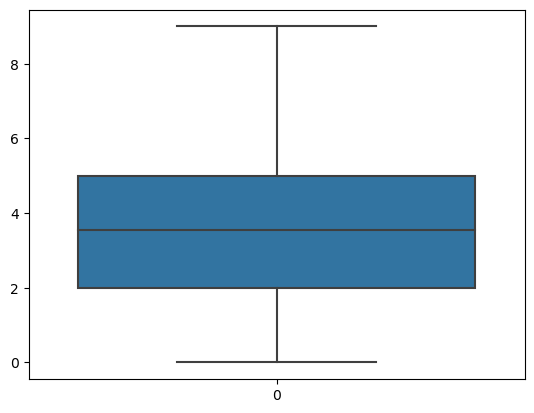

In [29]:
sns.boxplot(ds['Num_of_Loan'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=2.000, 75th=5.000, IQR=3.000
Identified outliers: 0


<AxesSubplot:>

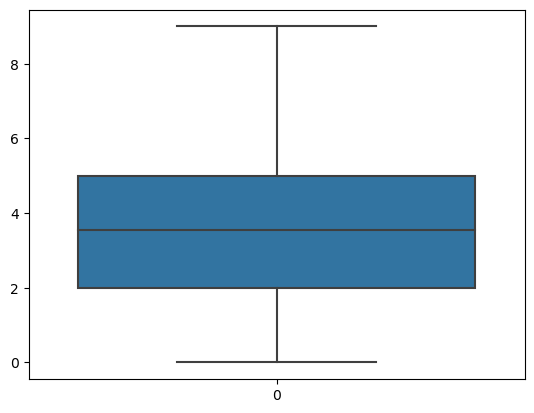

In [30]:

q25, q75 = percentile(ds['Num_of_Loan'], 25), percentile(ds['Num_of_Loan'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Num_of_Loan'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Num_of_Loan'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

<AxesSubplot:>

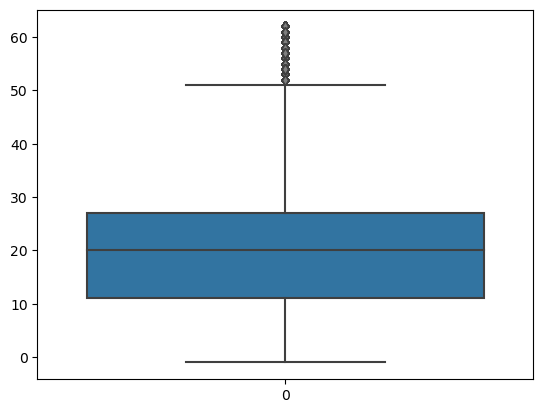

In [31]:
sns.boxplot(ds['Delay_from_due_date'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=11.000, 75th=27.000, IQR=16.000
Identified outliers: 5755


<AxesSubplot:>

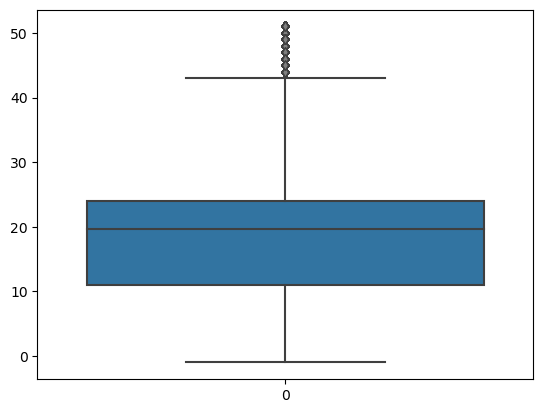

In [13]:
q25, q75 = percentile(ds['Delay_from_due_date'], 25), percentile(ds['Delay_from_due_date'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Delay_from_due_date'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

for i in outliers:
    ds['Delay_from_due_date'] = ds['Delay_from_due_date'].replace(i,ds['Delay_from_due_date'].mean())


sns.boxplot(ds['Delay_from_due_date'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

<AxesSubplot:>

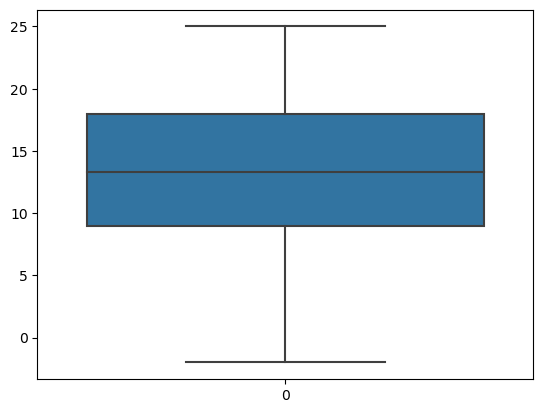

In [33]:
sns.boxplot(ds['Num_of_Delayed_Payment'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=9.000, 75th=18.000, IQR=9.000
Identified outliers: 0


<AxesSubplot:>

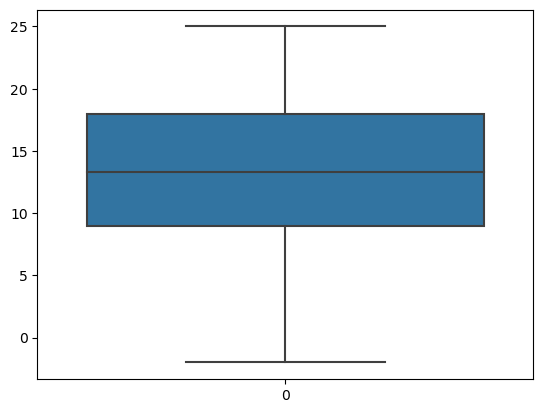

In [34]:

q25, q75 = percentile(ds['Num_of_Delayed_Payment'], 25), percentile(ds['Num_of_Delayed_Payment'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Num_of_Delayed_Payment'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Num_of_Delayed_Payment'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


<AxesSubplot:>

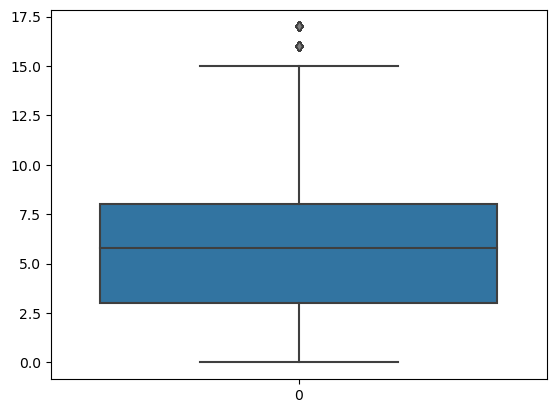

In [35]:
sns.boxplot(ds['Num_Credit_Inquiries'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=3.000, 75th=8.000, IQR=5.000
Identified outliers: 729


<AxesSubplot:>

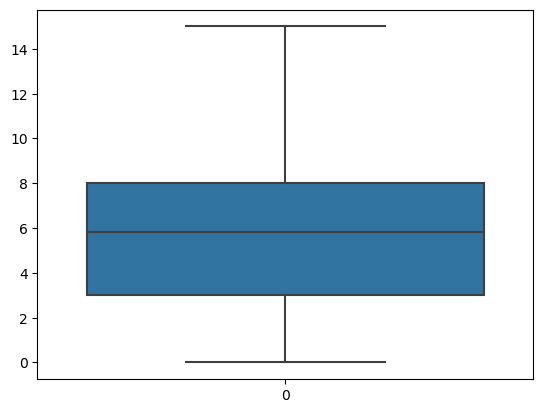

In [14]:

q25, q75 = percentile(ds['Num_Credit_Inquiries'], 25), percentile(ds['Num_Credit_Inquiries'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Num_Credit_Inquiries'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))


for i in outliers:
    ds['Num_Credit_Inquiries'] = ds['Num_Credit_Inquiries'].replace(i,ds['Num_Credit_Inquiries'].mean())

sns.boxplot(ds['Num_Credit_Inquiries'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

<AxesSubplot:>

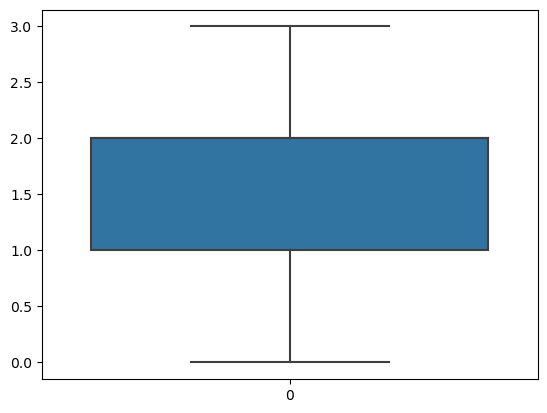

In [37]:
sns.boxplot(ds['Credit_Mix'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=4.000, 75th=7.000, IQR=3.000
Identified outliers: 0


<AxesSubplot:>

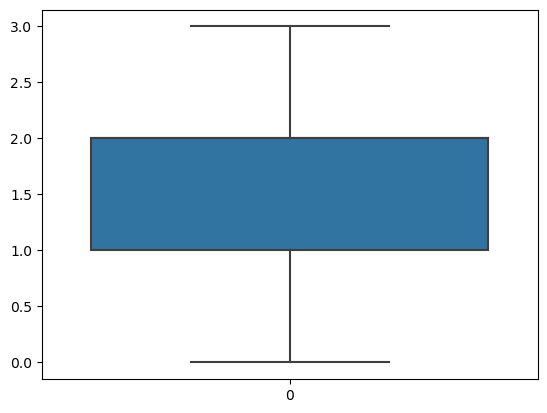

In [38]:

q25, q75 = percentile(ds['Num_Credit_Card'], 25), percentile(ds['Num_Credit_Card'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Num_Credit_Card'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Credit_Mix'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

<AxesSubplot:>

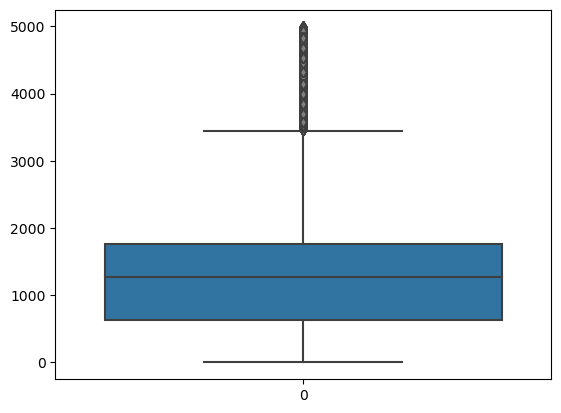

In [39]:
sns.boxplot(ds['Outstanding_Debt'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=632.460, 75th=1760.010, IQR=1127.550
Identified outliers: 7696


<AxesSubplot:>

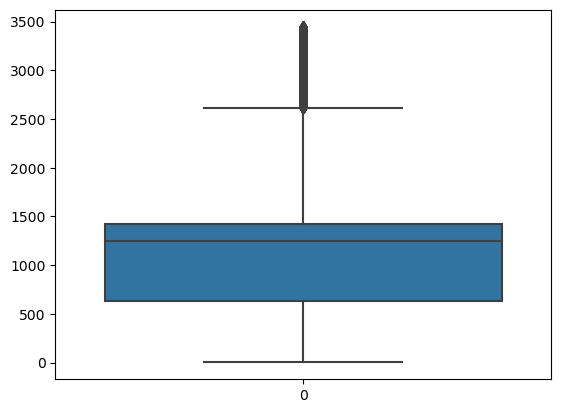

In [15]:
q25, q75 = percentile(ds['Outstanding_Debt'], 25), percentile(ds['Outstanding_Debt'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Outstanding_Debt'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

for i in outliers:
    ds['Outstanding_Debt'] = ds['Outstanding_Debt'].replace(i,ds['Outstanding_Debt'].mean())

sns.boxplot(ds['Outstanding_Debt'])

<AxesSubplot:>

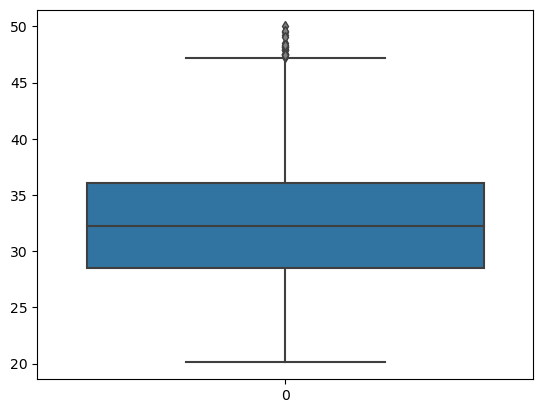

In [41]:
sns.boxplot(ds['Credit_Utilization_Ratio'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=28.537, 75th=36.033, IQR=7.496
Identified outliers: 19


<AxesSubplot:>

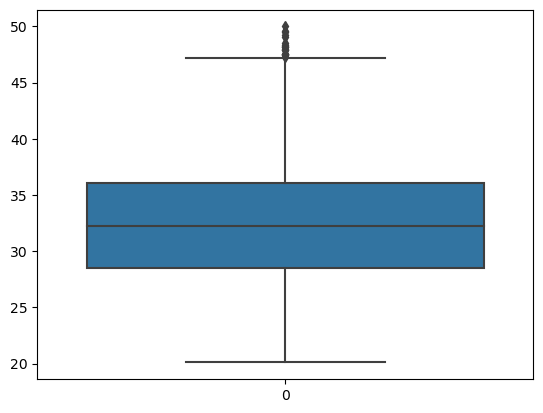

In [42]:


q25, q75 = percentile(ds['Credit_Utilization_Ratio'], 25), percentile(ds['Credit_Utilization_Ratio'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Credit_Utilization_Ratio'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Credit_Utilization_Ratio'])


<AxesSubplot:>

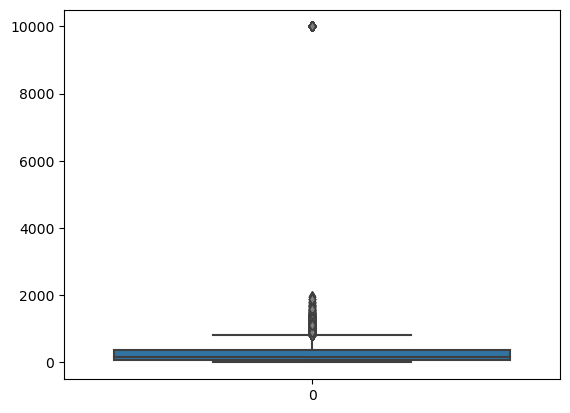

In [43]:
sns.boxplot(ds['Amount_invested_monthly'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

Percentiles: 25th=76.154, 75th=372.058, IQR=295.904
Identified outliers: 5984


<AxesSubplot:>

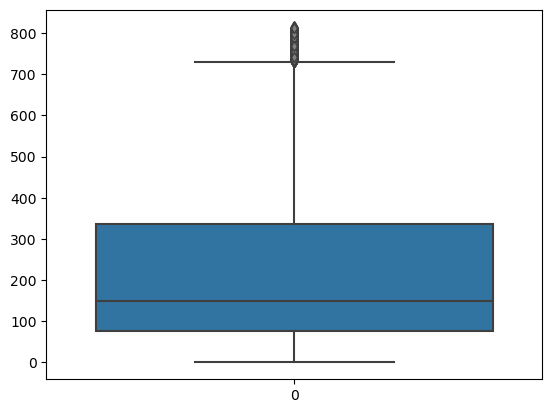

In [16]:

q25, q75 = percentile(ds['Amount_invested_monthly'], 25), percentile(ds['Amount_invested_monthly'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Amount_invested_monthly'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))


for i in outliers:
    ds['Amount_invested_monthly'] = ds['Amount_invested_monthly'].replace(i,ds['Amount_invested_monthly'].mean())

sns.boxplot(ds['Amount_invested_monthly'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


<AxesSubplot:>

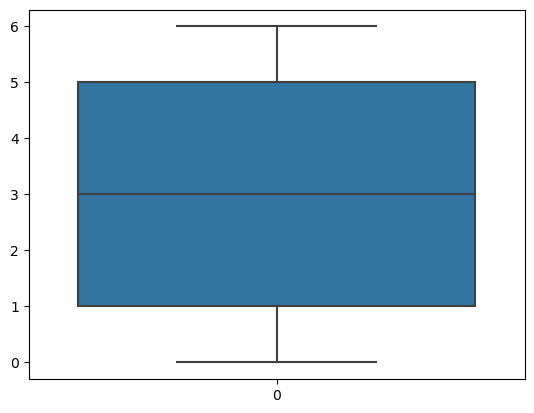

In [45]:
sns.boxplot(ds['Payment_Behaviour'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


Percentiles: 25th=1.000, 75th=5.000, IQR=4.000
Identified outliers: 0


<AxesSubplot:>

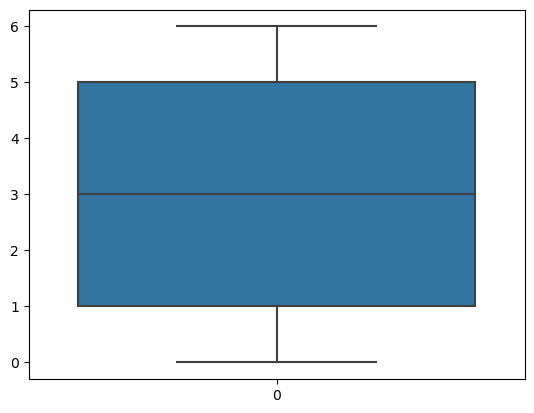

In [46]:

q25, q75 = percentile(ds['Payment_Behaviour'], 25), percentile(ds['Payment_Behaviour'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in ds['Payment_Behaviour'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

sns.boxplot(ds['Payment_Behaviour'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


After having looked at our dataset and having cleaned it, we can now start collecting data into array of dependent (what we want to predict) and independent variables  

In [17]:
#collect data into arrays
X = ds.iloc[:, :-1].values      #independent variable
y = ds.iloc[:, -1].values       #dependent variable

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
#encode data. This step is really important, we have already transformed the categorical data into integers. REMEMBER, NEVER TRAIN ON THE TEST SET!!

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

We can now decide three models that can help us solving this problem. 

In [20]:
from sklearn.svm import SVC 
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score

{'C': 1, 'kernel': 'poly', 'max_iter': 1000}
              precision    recall  f1-score   support

        Good       0.47      0.05      0.10      4428
        Poor       0.52      0.02      0.03      7277
    Standard       0.54      0.98      0.69     13295

    accuracy                           0.53     25000
   macro avg       0.51      0.35      0.27     25000
weighted avg       0.52      0.53      0.39     25000



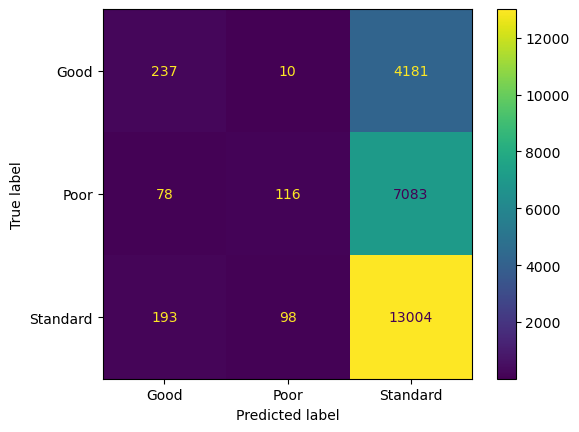

In [51]:
param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10], 'max_iter':[1000]}
classifier = SVC()

clf_svc = GridSearchCV(classifier, param_grid)

clf_svc.fit(X_train,y_train)
print(clf_svc.best_params_)
y_pred_svc = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))


_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

[19:43:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:43:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:44:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:45:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

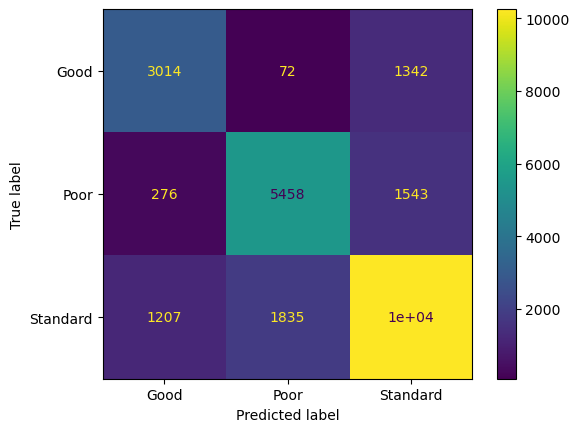

In [52]:
#size = 10
param_grid = {'max_depth':[7, 11, 13],
              #'lambda': np.random.uniform(1e-3,10,size).tolist(),
              #'alpha': np.random.uniform(1e-3,10,size).tolist(),
              #'colsample_bytree': np.random.uniform(0.3,1,size).tolist(),
              'learning_rate':[0.1, 0.001], #loguniform distribution
              #'min_child_weight':np.random.randint(1,300,size).tolist()
              }
cls = XGBClassifier()
clf = GridSearchCV(cls, param_grid)
#print(clf.best_params_)

clf_xgb = clf.fit(X_train,y_train)

print(clf_xgb.best_params_)
y_pred_xgb = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'metric': 'manhattan', 'n_neighbors': 8}
              precision    recall  f1-score   support

        Good       0.59      0.66      0.62      4428
        Poor       0.69      0.70      0.69      7277
    Standard       0.76      0.72      0.74     13295

    accuracy                           0.70     25000
   macro avg       0.68      0.69      0.68     25000
weighted avg       0.71      0.70      0.70     25000



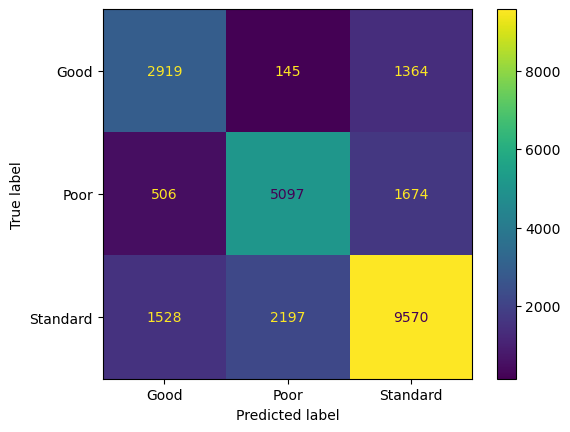

In [53]:
#k_range = list(range(5, 10))

param_grid = {'n_neighbors':[8, 10, 14], 'metric' : ['manhattan', 'l2', 'l1', 'euclidean', 'cosine']}
knn = neighbors.KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search

grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred_knn = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_knn))

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

{'activation': 'tanh', 'learning_rate_init': 0.001}
              precision    recall  f1-score   support

        Good       0.52      0.71      0.60      4428
        Poor       0.63      0.74      0.68      7277
    Standard       0.79      0.62      0.69     13295

    accuracy                           0.67     25000
   macro avg       0.65      0.69      0.66     25000
weighted avg       0.69      0.67      0.67     25000



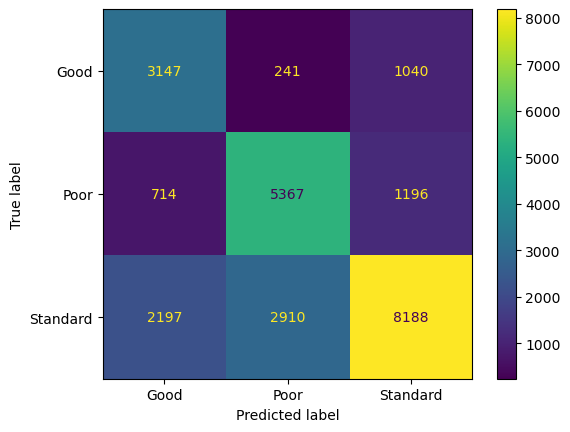

In [22]:
cls_mlp = MLPClassifier( 
    hidden_layer_sizes=(5,5,3)    
    )

param_grid_mlp = {'activation':['identity', 'logistic', 'tanh', 'relu'], 'learning_rate_init':(0.001, 0.005, 0.01)}

classifier = GridSearchCV(cls_mlp, param_grid_mlp)
clf_mlp = classifier.fit(X_train,y_train)
print(clf_mlp.best_params_)
y_pred_mlp = clf_mlp.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

In [55]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(classifier, X_train, y_train, cv=10)
#print(scores)